# Regresión Lineal - Datos ficticios

Resumen:
+ Suma de los cuadrados totales, de las diferencias y de la regresión
+ Encontrando los coeficientes óptimos de la regresión
+ Interpretar los parámetros de la regresión

## Modelos de Regresión Lineal
### Modelo con datos simulados
+ *y* = a + b * x
+ *X* : 100 valores distribuídos según una N(1.5, 2.5)
+ *Y* = 5 + 1.9 * x + e
+ *e* estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 + np.random.randn(100)
y_pred = 5 + 1.9 * x
y_act = 5 + 1.9 * x + res

In [3]:
# Vamos a pasar los vectores a listas para crear nuestro dataframe
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [4]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [5]:
data.head()

,x,y_actual,y_prediccion
0,-0.224900,6.096535,4.572690
1,-0.435275,4.299976,4.172977
2,3.677063,13.957937,11.986419
3,-0.627466,3.809508,3.807814
4,6.558388,17.190835,17.460936


Text(0.5,1,'Valor actual vs Predicción')

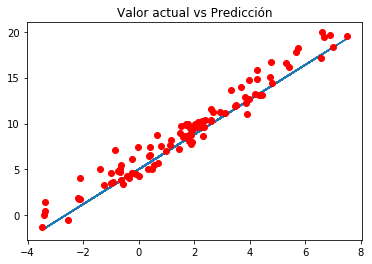

In [6]:
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.title("Valor actual vs Predicción")

In [7]:
# añadimos una línea horizontal para visualizar dónde se encuentra el promedio de las x
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5,1,'Valor actual vs Predicción')

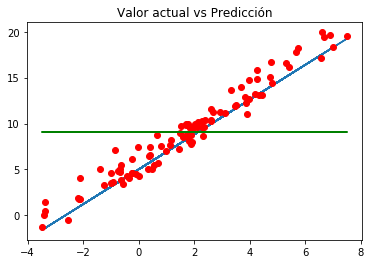

In [8]:
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs Predicción")

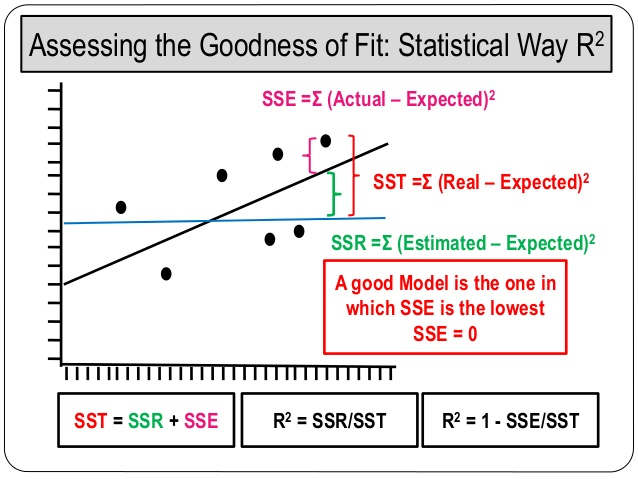

In [9]:
Image(filename="./images/correlacion_sst_ssr_sse.jpg")

## ¿Como es la predicción de buena?
+ SST = SSD + SSR
+ SST : Variabilidad de los datos con respecto de su media
+ SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
+ SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
+ R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [10]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"] - y_m) ** 2
data["SSD"]=(data["y_prediccion"] - data["y_actual"]) ** 2
data["SST"]=(data["y_actual"] - y_m) ** 2
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-0.224900,6.096535,4.572690,19.918562,2.322101,8.638764
1,-0.435275,4.299976,4.172977,23.646195,0.016129,22.427196
2,3.677063,13.957937,11.986419,8.706673,3.886881,24.228297
3,-0.627466,3.809508,3.807814,27.330912,0.000003,27.313211
4,6.558388,17.190835,17.460936,70.984409,0.072955,66.506026


In [11]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [12]:
SSR

2344.2103662737145

In [13]:
SSD

166.1886107208386

In [14]:
SST

2375.207451152416

In [15]:
SSR + SSD

2510.398976994553

In [16]:
R2 = SSR/SST
R2

0.9869497357531182

(array([ 1.,  3.,  8.,  8., 13., 18., 23., 14., 10.,  2.]),
 array([-3.6556819 , -3.15271915, -2.6497564 , -2.14679364, -1.64383089,
        -1.14086813, -0.63790538, -0.13494263,  0.36802013,  0.87098288,
         1.37394563]),
 <a list of 10 Patch objects>)

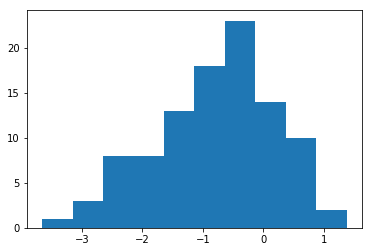

In [17]:
# Podemos ver que los errores se distribuyen según una normal
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión
+ y = a + b * x
+ b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
+ a = y_m - b * x_m

In [18]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.7017383530338912, 9.035711869247198)

In [19]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [20]:
beta = sum(data["beta_n"])/sum(data["beta_d"])
alpha = y_mean - beta * x_mean
alpha, beta

(5.8069611345913845, 1.8973250082185287)

In [21]:
data["y_model"] = alpha + beta * data["x"]
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.224900,6.096535,4.572690,19.918562,2.322101,8.638764,5.662732,3.711935,5.380253
1,-0.435275,4.299976,4.172977,23.646195,0.016129,22.427196,10.120334,4.566828,4.981102
2,3.677063,13.957937,11.986419,8.706673,3.886881,24.228297,9.722990,3.901906,12.783544
3,-0.627466,3.809508,3.807814,27.330912,0.000003,27.313211,12.172898,5.425193,4.616454
4,6.558388,17.190835,17.460936,70.984409,0.072955,66.506026,39.606570,23.587042,18.250354


In [22]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [23]:
SSR, SSD, SST

(2273.40937948236, 101.79807167005865, 2375.207451152416)

In [24]:
R2 = SSR / SST
R2

0.957141397640587

Text(0.5,1,'Valor Actual vs Predicción')

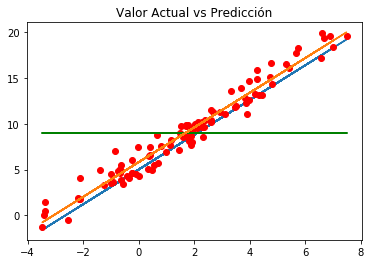

In [25]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Interpretar los parámetros de la regresión

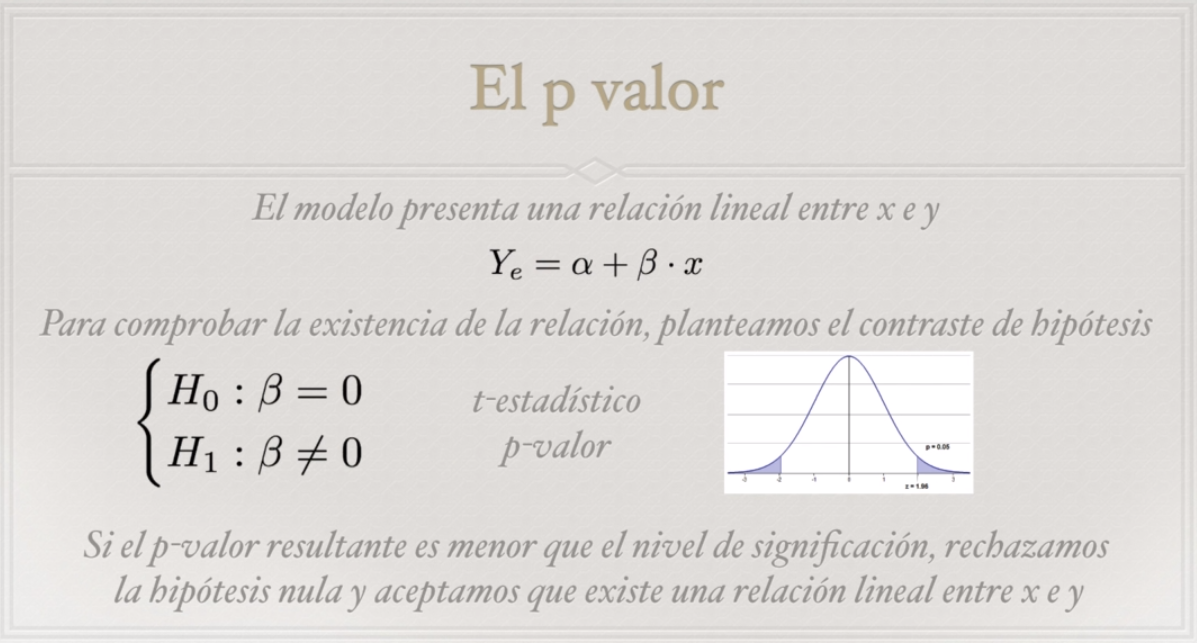

In [27]:
Image(filename="./images/regresion_lineal_07.png")

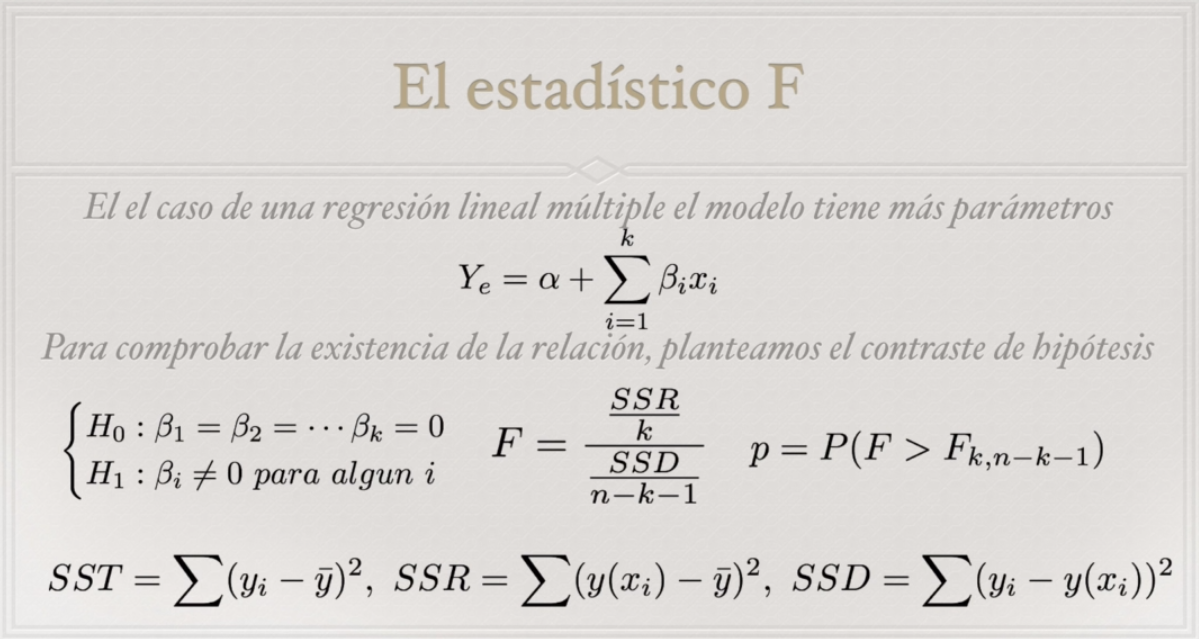

In [28]:
Image(filename="./images/regresion_lineal_08.png")

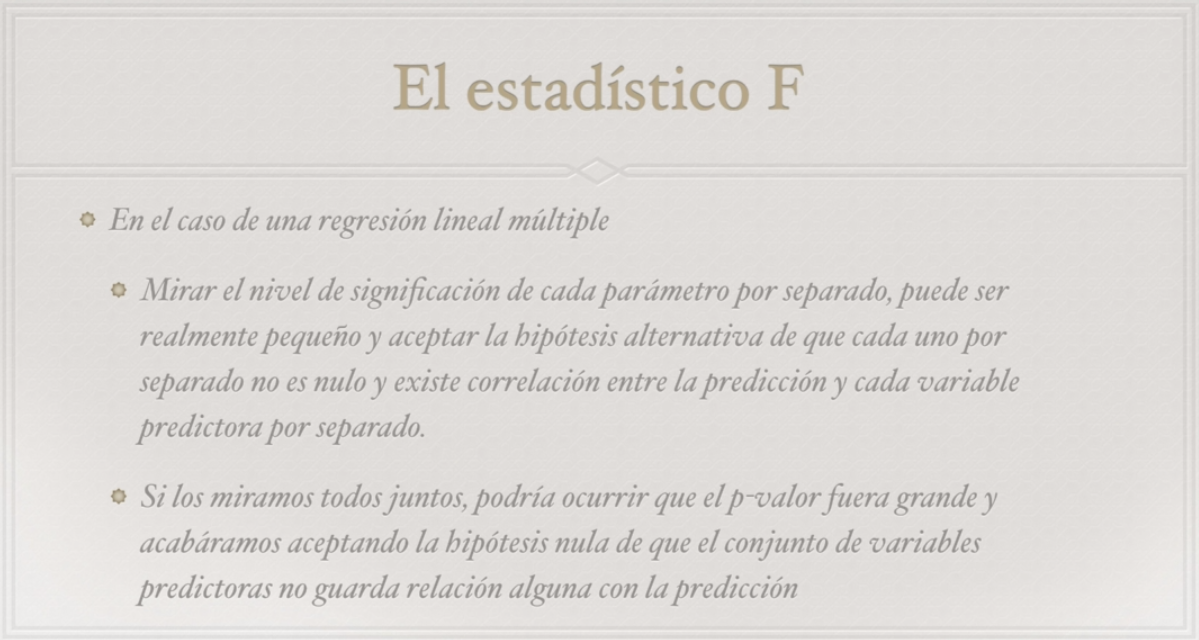

In [29]:
Image(filename="./images/regresion_lineal_09.png")

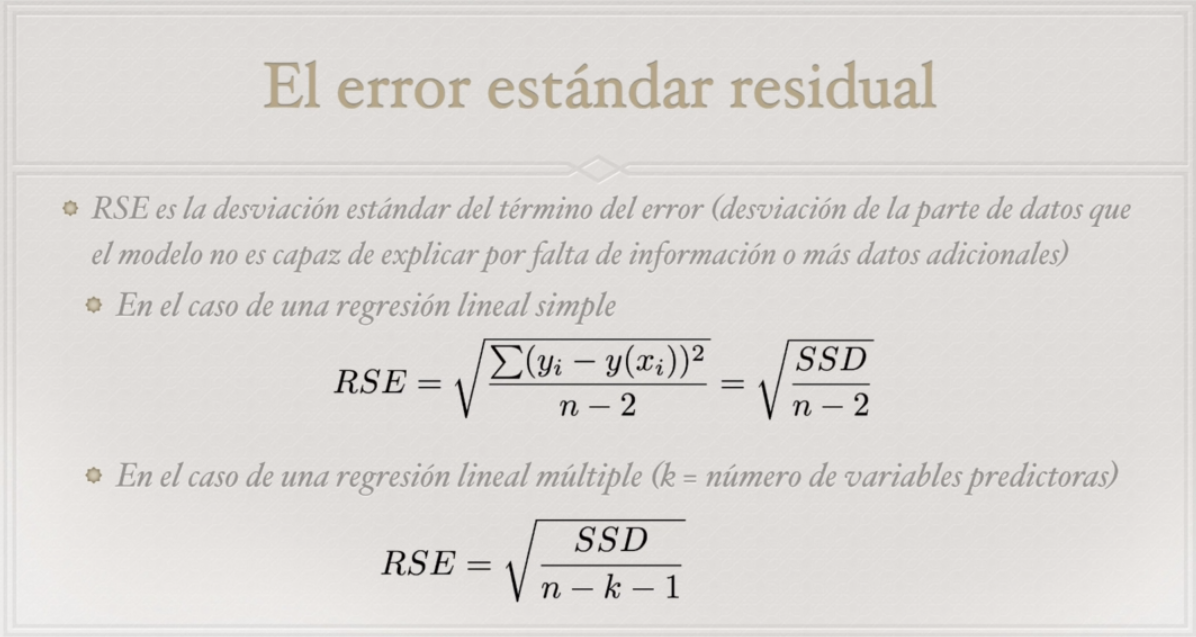

In [30]:
Image(filename="./images/regresion_lineal_10.png")

## Error estándar de los residuos (RSE)

In [26]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

1.0191937172922259

In [31]:
np.mean(data["y_actual"])

9.035711869247198

In [32]:
# Porcentaje del error sobre la media
RSE / np.mean(data["y_actual"])

0.11279617279088151